# Analysis on database for old age patients in Chinese hospital

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [2]:
fall = pd.read_csv("fall_detection.csv")

In [3]:
fall.shape

(16382, 13)

In [4]:
fall.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,3,4722.92,4019.64,-1600.00,13,79,317,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4059.12,2191.03,-1146.08,20,54,165,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4773.56,2787.99,-1263.38,46,67,224,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8271.27,9545.98,-2848.93,26,138,554,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7102.16,14148.80,-2381.15,85,120,809,NaN,NaN,NaN,NaN,NaN,NaN


### Eploring Data

In [5]:
fall =  fall.drop(columns=['Unnamed: 7', 'Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'])
fall.shape


(16382, 7)

In [6]:
fall.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [7]:
fall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
ACTIVITY       16382 non-null int64
TIME           16382 non-null float64
SL             16382 non-null float64
EEG            16382 non-null float64
BP             16382 non-null int64
HR             16382 non-null int64
CIRCLUATION    16382 non-null int64
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [8]:
fall.isnull().any()
fall.isnull().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

In [9]:
fall.describe().T

,count,mean,std,min,25%,50%,75%,max
ACTIVITY,16382.0,2.361494,1.739195,0.000000e+00,0.000,3.000,4.00,5.0
TIME,16382.0,10936.842478,5261.463601,1.954230e+03,7263.685,9769.355,13481.65,50895.5
SL,16382.0,75271.979925,127502.241688,4.222420e+01,9941.170,31189.200,80761.45,2426140.0
EEG,16382.0,-5621.125313,108220.924420,-1.262600e+07,-5630.000,-3361.275,-2150.00,1410000.0
BP,16382.0,58.251068,48.292926,0.000000e+00,25.000,44.000,78.00,533.0
HR,16382.0,211.536992,129.949521,3.300000e+01,119.000,180.000,271.00,986.0
CIRCLUATION,16382.0,2894.341472,3825.927830,5.000000e+00,587.000,1581.000,3539.00,52210.0


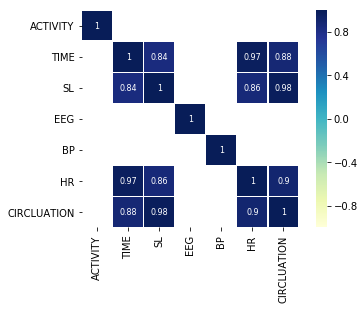

In [10]:
corr = fall.corr()
#sns.heatmap(corr)
plt.figure()

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### - No correlation .
### - Multicollinearity exists

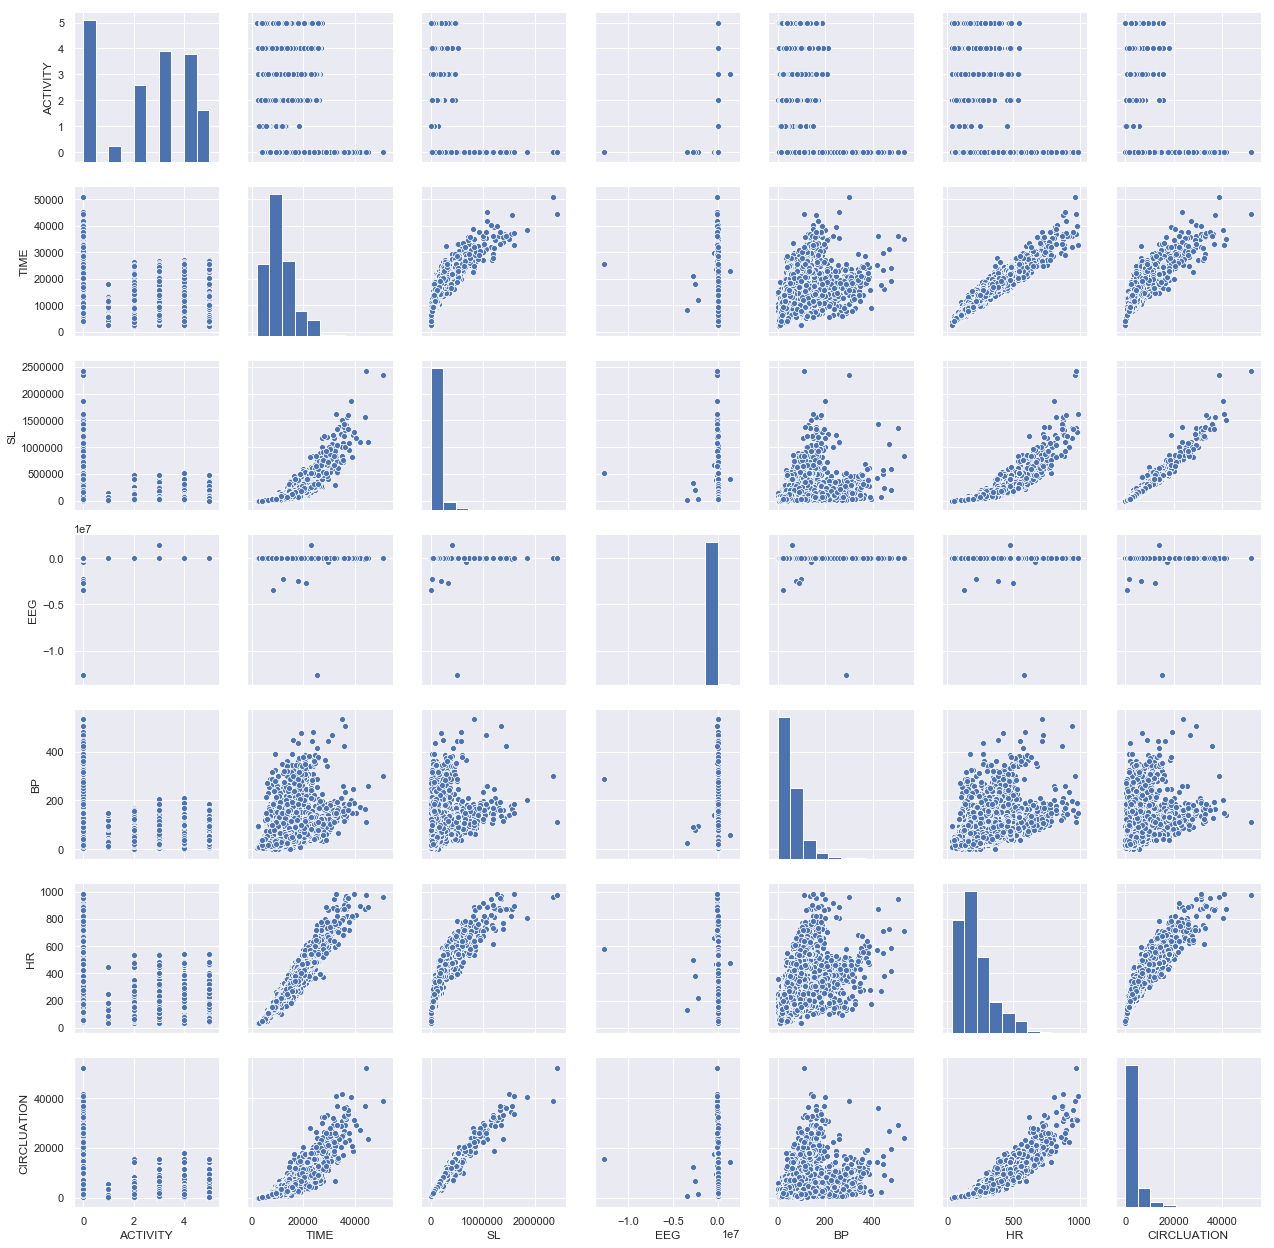

In [11]:
#pair plot
sns.set()
sns.pairplot(fall)


In [12]:
print(fall['ACTIVITY'].unique())

[3 2 4 5 0 1]


In [13]:
print(fall.groupby('ACTIVITY').size())

ACTIVITY
0    4608
1     502
2    2502
3    3588
4    3494
5    1688
dtype: int64


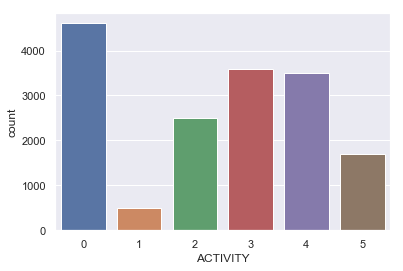

In [14]:
sns.countplot(fall['ACTIVITY'],label="Count")
plt.show()


- 0- Standing
- 1- Walking
- 2- Sitting 
- 3- Falling 
- 4- Cramps 
- 5- Running

## Visualization

- Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

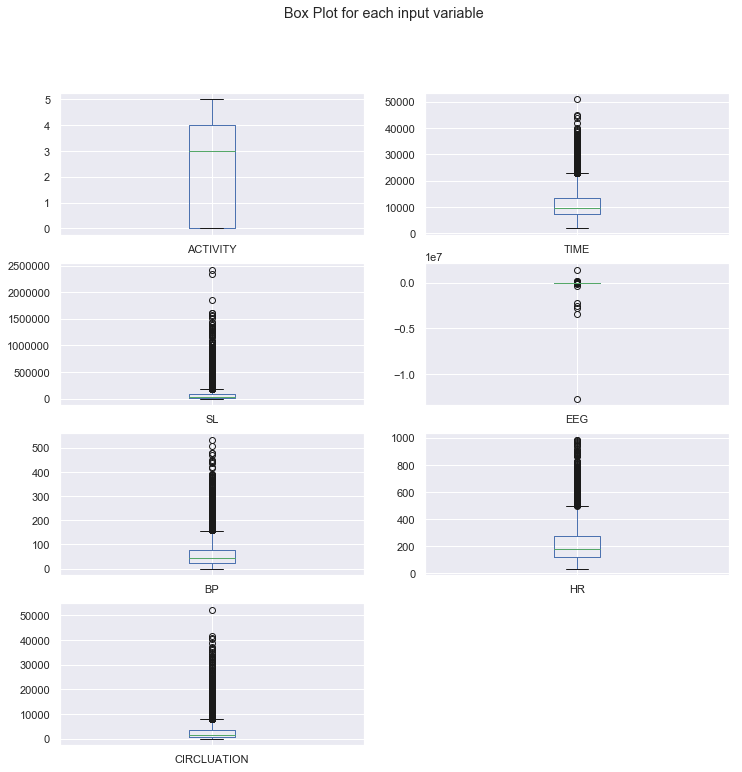

In [15]:
fall.plot(kind='box', subplots=True, layout=(4,2), figsize=(12,12), 
                                        title='Box Plot for each input variable')
plt.show()

## Multivariant Analysis

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


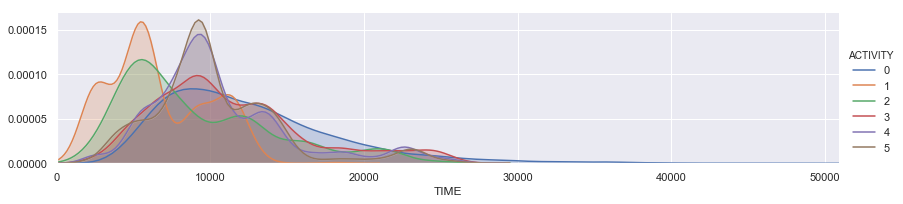

In [16]:
## visualize it by facet graphs
# acitivity vs Time
facet = sns.FacetGrid(fall, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'TIME',shade= True)
facet.set(xlim=(0, fall['TIME'].max()))
facet.add_legend();    #time and activity

- we can see the Time is noraml across the activity

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


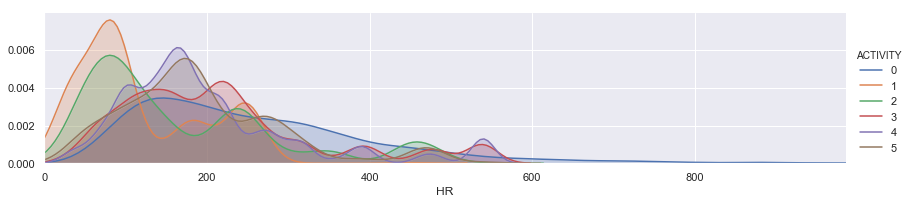

In [17]:
#activity vs Heart rate
facet = sns.FacetGrid(fall, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'HR',shade= True)
facet.set(xlim=(0, fall['HR'].max()))
facet.add_legend(); 

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


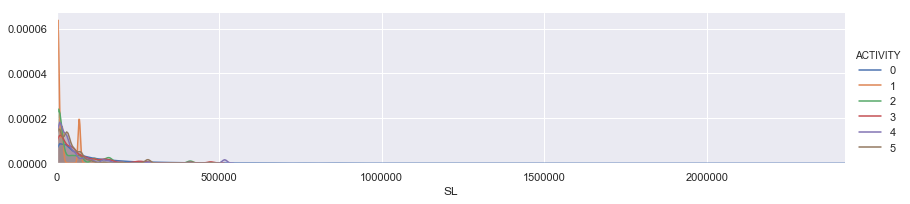

In [18]:
#Activity vs Sugar level
facet = sns.FacetGrid(fall, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'SL',shade= True)
facet.set(xlim=(0, fall['SL'].max()))
facet.add_legend();    #sugar lavel effecting more on walking

 - High sugar level

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


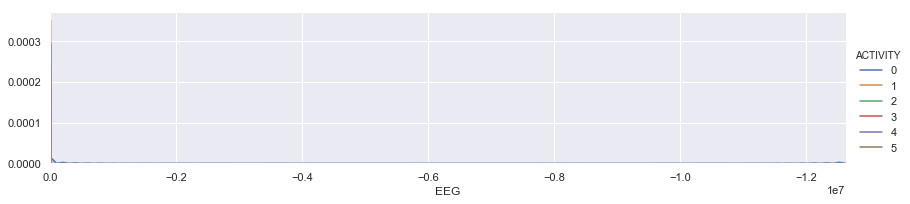

In [19]:
#activity vs EEG
facet = sns.FacetGrid(fall, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'EEG',shade= True)
facet.set(xlim=(0, fall['EEG'].min()))
facet.add_legend();   #not at all effecting

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


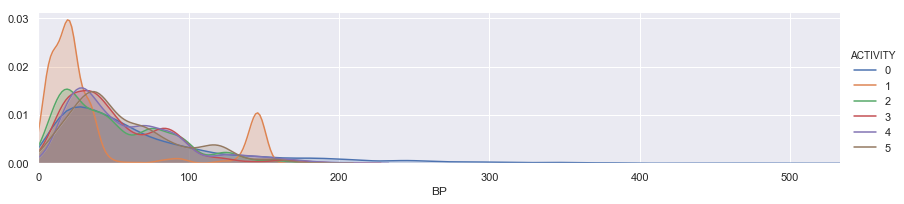

In [20]:
# activity vs Bp
facet = sns.FacetGrid(fall, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'BP',shade= True)
facet.set(xlim=(0, fall['BP'].max()))
facet.add_legend();    #walking is more effecting on Blood pressure

- NORMAL BP for 1-walking,2-running

### - We can see there are otliers in the data

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


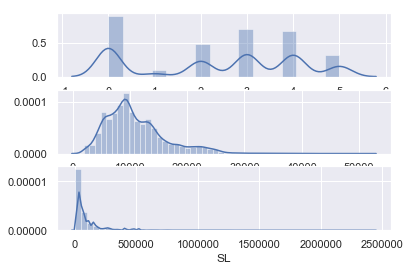

In [21]:
plt.subplot(3, 1, 1)
sns.distplot(fall['ACTIVITY'], kde=True)
plt.subplot(3,1,2)
sns.distplot(fall['TIME'], kde=True)
plt.subplot(3,1,3)
sns.distplot(fall['SL'], kde=True)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


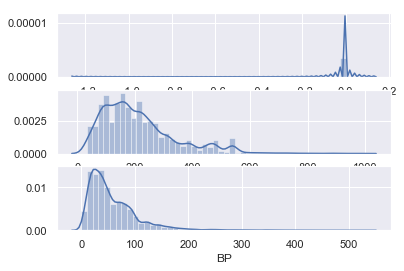

In [22]:
plt.subplot(3, 1, 1)
sns.distplot(fall['EEG'], kde=True)
plt.subplot(3,1,2)
sns.distplot(fall['HR'], kde=True)
plt.subplot(3,1,3)
sns.distplot(fall['BP'], kde=True)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


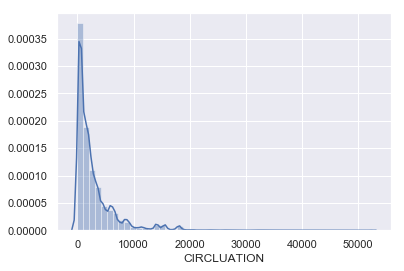

In [23]:
sns.distplot(fall['CIRCLUATION'], kde=True)

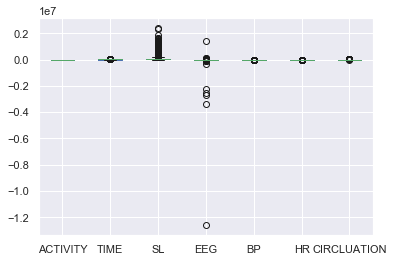

In [24]:
fall.boxplot()

## Outlier Detection

In [25]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
fall.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
ACTIVITY,16382.0,2.361494,1.739195,0.000000e+00,0.000,3.000,4.00,5.000,5.0000,5.000,5.0
TIME,16382.0,10936.842478,5261.463601,1.954230e+03,7263.685,9769.355,13481.65,18363.400,21955.7600,25887.848,50895.5
SL,16382.0,75271.979925,127502.241688,4.222420e+01,9941.170,31189.200,80761.45,180354.100,309347.6000,521414.680,2426140.0
EEG,16382.0,-5621.125313,108220.924420,-1.262600e+07,-5630.000,-3361.275,-2150.00,-1169.946,-839.1564,-236.810,1410000.0
BP,16382.0,58.251068,48.292926,0.000000e+00,25.000,44.000,78.00,116.000,148.0000,245.000,533.0
HR,16382.0,211.536992,129.949521,3.300000e+01,119.000,180.000,271.00,393.900,482.9500,585.190,986.0
CIRCLUATION,16382.0,2894.341472,3825.927830,5.000000e+00,587.000,1581.000,3539.00,6746.000,10237.9000,18067.000,52210.0


### - from the baove we can see there are otliers in the data

In [26]:
Q1 = fall.quantile(0.25)
Q3 = fall.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ACTIVITY           4.000
TIME            6217.965
SL             70820.280
EEG             3480.000
BP                53.000
HR               152.000
CIRCLUATION     2952.000
dtype: float64


In [27]:
data = fall[~((fall < (Q1 - 1.5 * IQR)) |(fall > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
ACTIVITY,14203.0,2.466380,1.699729,0.0000,1.000,3.00,4.00,5.000,5.0000,5.000,5.0
TIME,14203.0,9557.999935,3642.738705,1954.2300,6865.515,9257.35,12012.30,14367.540,15983.3400,19186.378,22727.4
SL,14203.0,39801.316952,42235.188756,42.2242,8756.000,26091.60,56630.05,107474.200,140911.1000,169365.580,186768.0
EEG,14203.0,-3439.829507,2037.097672,-10829.0000,-4550.000,-3057.88,-1920.00,-1119.106,-806.3628,-305.020,3070.0
BP,14203.0,48.197916,32.723163,0.0000,23.000,39.00,69.00,94.800,117.0000,147.000,157.0
HR,14203.0,176.110188,86.167965,33.0000,107.000,166.00,234.00,289.000,330.0000,429.940,494.0
CIRCLUATION,14203.0,1798.029994,1655.717520,5.0000,517.000,1364.00,2599.00,4426.000,5537.0000,6744.000,7704.0


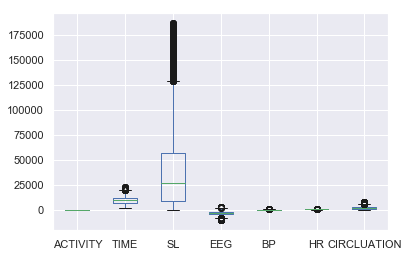

In [29]:
data.boxplot()

#### 2) Which of the variables explain the activity best? Are there more than a few variables that will correlate to the activity in a combination? How can we best explain this 

In [30]:
data.corr()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
ACTIVITY,1.000000,-0.028061,-0.085315,0.211172,0.062635,-0.067009,-0.066579
TIME,-0.028061,1.000000,0.876774,-0.801691,0.315648,0.960865,0.866701
SL,-0.085315,0.876774,1.000000,-0.764473,0.271412,0.909972,0.987348
EEG,0.211172,-0.801691,-0.764473,1.000000,-0.324064,-0.856581,-0.773443
BP,0.062635,0.315648,0.271412,-0.324064,1.000000,0.330099,0.277671
HR,-0.067009,0.960865,0.909972,-0.856581,0.330099,1.000000,0.915654
CIRCLUATION,-0.066579,0.866701,0.987348,-0.773443,0.277671,0.915654,1.000000


In [31]:
#applied zscore for pca
from scipy.stats import zscore
data1 = data.apply(zscore)
data1.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,0.313955,-1.327367,-0.847230,0.903194,-1.075665,-1.127027,-0.894526
1,-0.274395,-1.509599,-0.890528,1.126029,-0.861742,-1.417168,-0.986332
2,-0.274395,-1.313465,-0.876393,1.068445,-0.067169,-1.266295,-0.950697
3,0.902305,-0.353244,-0.716379,0.290080,-0.678379,-0.442293,-0.751380
4,0.902305,-0.674198,-0.607394,0.519718,1.124689,-0.651195,-0.597363


### Let us Do pca

In [32]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(data1)
data_pca = pca.fit_transform(data1)
data_pca

array([[-2.45467764, -0.14262335, -0.65300333, ..., -0.37448546,
        -0.05152498,  0.07312118],
       [-2.74945949, -0.55229272, -0.17831584, ..., -0.37180464,
         0.04840126,  0.06334412],
       [-2.40335889, -0.19700248,  0.47726235, ..., -0.23104679,
         0.04143452,  0.04407167],
       ...,
       [-0.62104924, -0.41768111, -0.19162346, ...,  0.12395709,
        -0.0130206 , -0.03131222],
       [-0.41911879,  1.46963791,  1.04143054, ..., -0.27656106,
        -0.15521487, -0.0268012 ],
       [-0.16455869, -0.05778216, -0.89184424, ...,  0.09201438,
        -0.25737768,  0.02977661]])

In [33]:
print(pca.singular_values_)

[256.36832991 122.81969267 109.14871463  62.57238919  47.07120729
  20.68287576  11.80579585]


In [34]:
pca.explained_variance_ratio_

array([0.66107483, 0.15172526, 0.11982822, 0.03938106, 0.02228602,
       0.00430273, 0.00140189])

In [35]:
pca.explained_variance_ratio_.cumsum()

array([0.66107483, 0.81280009, 0.93262831, 0.97200937, 0.99429539,
       0.99859811, 1.        ])

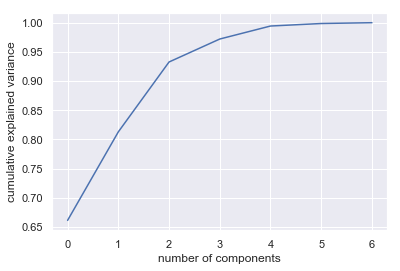

In [36]:
%matplotlib inline
fig = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### 3) Between Heartrate and BP which gives the best cluster for activities? Explain your answer 

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


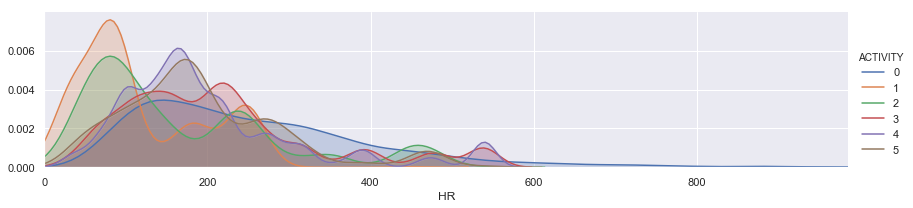

In [89]:
#activity vs Heart rate
facet = sns.FacetGrid(fall, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'HR',shade= True)
facet.set(xlim=(0, fall['HR'].max()))
facet.add_legend(); 

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


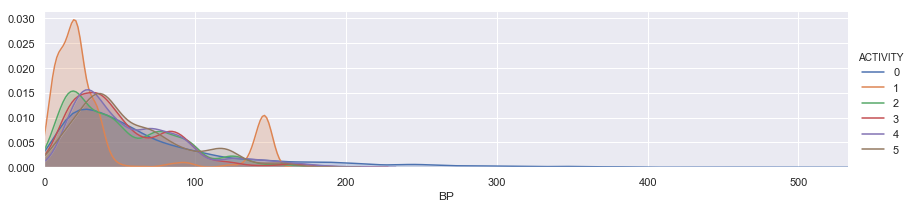

In [90]:
# activity vs Bp
facet = sns.FacetGrid(fall, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'BP',shade= True)
facet.set(xlim=(0, fall['BP'].max()))
facet.add_legend();    #walking is more effecting on Blood pressure

In [37]:
data.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [38]:
df = fall.drop(columns=['TIME', 'SL','EEG','CIRCLUATION'])


In [46]:
df.head()

,ACTIVITY,BP,HR
0,3,13,79
1,2,20,54
2,2,46,67
3,4,26,138
4,4,85,120


## Do Clustering

In [39]:
from sklearn.cluster import KMeans

In [81]:
# Scale the data
from sklearn.preprocessing import scale as scale
scaled_RCDF = scale(df)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
## Identify the optimal number of clusters 
# elbow method
cluster_range = range( 1, 10 )
cluster_wss = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(scaled_RCDF)
    cluster_wss.append( clusters.inertia_ )
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:10]

,num_clusters,cluster_wss
0,1,65528.000000
1,2,37867.297430
2,3,28396.523102
3,4,23134.466256
4,5,18743.798145
5,6,16261.404173
6,7,14261.728418
7,8,12588.672161
8,9,11078.267093


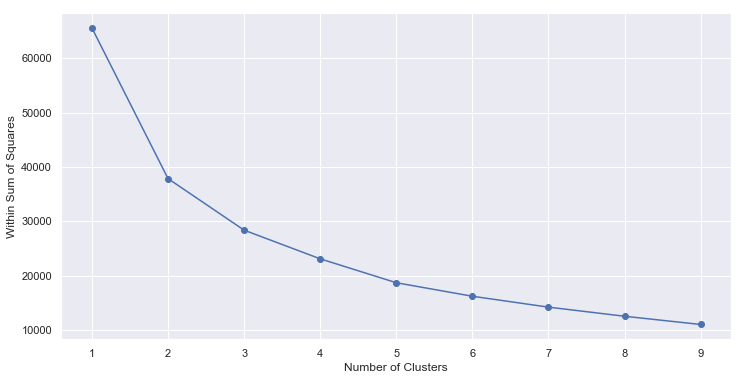

In [83]:
plt.figure(figsize=(12,6))
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.xticks(np.arange(min(clusters_df.num_clusters), 
                     max(clusters_df.num_clusters)+1, 
                     1.0))
plt.plot( clusters_df.num_clusters, 
         clusters_df.cluster_wss, 
         marker = "o" )

In [84]:
## Profiling the clusters

clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(scaled_RCDF)
cluster_labels
df['Clusters'] = cluster_labels

clus_profile = df.groupby(['Clusters'], 
                       as_index=False).mean()
clus_profile

,Clusters,ACTIVITY,BP,HR
0,0,2.422717,38.776254,190.453490
1,1,2.139876,128.747039,287.856176


In [85]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_RCDF)

## Getting a Visual Plot 
## Defining Colours and Labels for the Plot
def color_fun (row):
   if (row['Clusters'] == 0):
      return "red"
   if (row['Clusters'] == 1):
      return "green"
    return 0 


df['color'] = df.apply (lambda row: color_fun(row), axis=1)
plot_labels = df['ACTIVITY'].values.ravel()

IndentationError: unindent does not match any outer indentation level (<ipython-input-85-210842a6a265>, line 12)

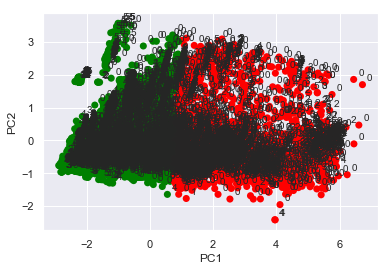

In [86]:
## Show the Cluster Plot
plt.scatter(x=plot_columns[:,0], 
            y=plot_columns[:,1],
            c=data['color'].values.tolist(),
            s=50, edgecolors='none')

for label, x, y in zip(
        plot_labels, plot_columns[:,0], 
        plot_columns[:,1]) :
    plt.annotate(
    label,
    xy=(x, y), xytext=(10, 2),
    textcoords='offset points', ha='right', va='bottom',
    )
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.show()
